In [1]:
"""
Script to implement the economic functions with a simple doublet example

SPE Hackathon 2021

author: Alexandros Daniilidis
contact: a.daniilidis@tudelft.nl
"""
#I have no idea why the dictionary is not being written like the example shown in the classes
#c 3 and p 3 are appearing as leading values in the key: value pairs and it is a mess. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load example simulation data

data = pd.read_csv('results/result_01.csv')

data.head()

,P14 : BHP (bar),P14 : p 19 reservoir P (bar),P14 : p 19 c 1 rate (Kmol/day),P14 : p 19 c 0 rate (Kmol/day),P14 : p 18 reservoir P (bar),P14 : p 18 c 1 rate (Kmol/day),P14 : p 18 c 0 rate (Kmol/day),P14 : p 17 c 1 rate (Kmol/day),P14 : p 17 c 0 rate (Kmol/day),P14 : p 15 c 1 rate (Kmol/day),...,P14 : p 7 c 1 rate (Kmol/day),P14 : p 7 reservoir P (bar),E05 : p 15 reservoir P (bar),P14 : p 8 c 1 rate (Kmol/day),I11 : p 7 reservoir P (bar),P12 : p 12 reservoir P (bar),P14 : p 9 c 0 rate (Kmol/day),P01 : p 12 reservoir P (bar),I11 : p 5 reservoir P (bar),P14 : p 9 c 1 rate (Kmol/day)
0,204.553512,212.019265,-17402.236934,-6.954703e+07,211.241947,-16448.578303,-6.624391e+07,-6327.062585,-2.528490e+07,-3703.248658,...,83886.413669,202.679196,196.202247,62000.838329,187.125169,180.065977,6.074717e+01,233.063483,186.149614,20770.589777
1,201.870432,212.009468,-23586.457671,-9.426191e+07,211.234088,-22977.995720,-9.254004e+07,-9174.136319,-3.666269e+07,-5967.377637,...,-8683.770428,202.682538,196.198499,-18938.023055,187.126816,180.065902,-1.465348e+08,233.046526,186.152140,-36672.365653
2,201.758989,211.857803,-23492.337785,-9.388579e+07,211.114011,-22956.408312,-9.245280e+07,-9239.803253,-3.692508e+07,-6041.459835,...,-10259.460674,202.714946,196.141428,-19481.309260,187.165286,180.064164,-1.438479e+08,232.834791,186.200146,-35999.934719
3,200.853019,210.291271,-21952.228390,-8.773071e+07,209.899191,-22196.737766,-8.939026e+07,-9356.898542,-3.739259e+07,-6500.872732,...,-17345.694553,202.455375,195.601010,-21806.427827,188.068513,179.962838,-1.299793e+08,231.427276,187.164670,-32529.281701
4,198.604254,206.307878,-17909.398821,-7.156653e+07,206.381614,-19076.051069,-7.682480e+07,-8146.529177,-3.255255e+07,-6795.339552,...,-23488.830757,200.766903,194.704292,-24307.283973,191.968166,177.307143,-1.230493e+08,228.261080,191.662474,-30794.108854


In [2]:
data.columns.tolist()

['P14 : BHP (bar)',
 'P14 : p 19 reservoir P (bar)',
 'P14 : p 19 c 1 rate (Kmol/day)',
 'P14 : p 19 c 0 rate (Kmol/day)',
 'P14 : p 18 reservoir P (bar)',
 'P14 : p 18 c 1 rate (Kmol/day)',
 'P14 : p 18 c 0 rate (Kmol/day)',
 'P14 : p 17 c 1 rate (Kmol/day)',
 'P14 : p 17 c 0 rate (Kmol/day)',
 'P14 : p 15 c 1 rate (Kmol/day)',
 'P14 : p 14 c 1 rate (Kmol/day)',
 'P14 : p 14 c 0 rate (Kmol/day)',
 'P14 : p 13 c 1 rate (Kmol/day)',
 'P14 : p 13 c 0 rate (Kmol/day)',
 'P14 : p 12 reservoir P (bar)',
 'P14 : p 12 c 1 rate (Kmol/day)',
 'P14 : p 12 c 0 rate (Kmol/day)',
 'P14 : p 11 c 0 rate (Kmol/day)',
 'P14 : p 10 reservoir P (bar)',
 'P14 : p 10 c 1 rate (Kmol/day)',
 'P14 : p 10 c 0 rate (Kmol/day)',
 'E02 : p 19 c 0 rate (Kmol/day)',
 'E02 : p 18 reservoir P (bar)',
 'P02 : p 13 c 0 rate (Kmol/day)',
 'E02 : p 17 reservoir P (bar)',
 'E06 : p 6 c 0 rate (Kmol/day)',
 'E02 : p 17 c 1 rate (Kmol/day)',
 'E01 : p 17 c 0 rate (Kmol/day)',
 'E02 : p 16 reservoir P (bar)',
 'I13 : p 11 c 

In [3]:
# list the collumn names that should be removed
press_gridcells = data.filter(like='reservoir').columns.tolist()
chem_cols = data.filter(like='kmol/day').columns.tolist()

# remove collumns from data
data.drop(columns=press_gridcells + chem_cols,inplace=True)

data

,P14 : BHP (bar),P14 : p 19 c 1 rate (Kmol/day),P14 : p 19 c 0 rate (Kmol/day),P14 : p 18 c 1 rate (Kmol/day),P14 : p 18 c 0 rate (Kmol/day),P14 : p 17 c 1 rate (Kmol/day),P14 : p 17 c 0 rate (Kmol/day),P14 : p 15 c 1 rate (Kmol/day),P14 : p 14 c 1 rate (Kmol/day),P14 : p 14 c 0 rate (Kmol/day),...,P14 : p 4 c 0 rate (Kmol/day),I02 : p 15 c 0 rate (Kmol/day),P14 : p 6 c 0 rate (Kmol/day),E05 : p 15 c 0 rate (Kmol/day),P14 : p 7 c 0 rate (Kmol/day),I13 : c 0 rate (Kmol/day),P14 : p 7 c 1 rate (Kmol/day),P14 : p 8 c 1 rate (Kmol/day),P14 : p 9 c 0 rate (Kmol/day),P14 : p 9 c 1 rate (Kmol/day)
0,204.553512,-17402.236934,-6.954703e+07,-16448.578303,-6.624391e+07,-6327.062585,-2.528490e+07,-3703.248658,-59.236536,-238549.603250,...,1.316487e+01,-584390.589331,3.609455e+01,-2.819717e+07,2.453403e+02,0.000000e+00,83886.413669,62000.838329,6.074717e+01,20770.589777
1,201.870432,-23586.457671,-9.426191e+07,-22977.995720,-9.254004e+07,-9174.136319,-3.666269e+07,-5967.377637,-103.365232,-416259.112502,...,4.857819e+00,20.554477,-1.760849e+04,-2.836865e+07,-3.469733e+07,1.499020e+09,-8683.770428,-18938.023055,-1.465348e+08,-36672.365653
2,201.758989,-23492.337785,-9.388579e+07,-22956.408312,-9.245280e+07,-9239.803253,-3.692508e+07,-6041.459835,-105.188469,-423602.961251,...,4.507774e+00,35.677405,-5.424320e+05,-2.792848e+07,-4.099324e+07,1.499015e+09,-10259.460674,-19481.309260,-1.438479e+08,-35999.934719
3,200.853019,-21952.228390,-8.773071e+07,-22196.737766,-8.939026e+07,-9356.898542,-3.739259e+07,-6500.872732,-119.692027,-482009.757685,...,1.692472e+00,42.136806,-4.420751e+06,-2.370605e+07,-6.930719e+07,1.499009e+09,-17345.694553,-21806.427827,-1.299793e+08,-32529.281701
4,198.604254,-17909.398821,-7.156653e+07,-19076.051069,-7.682480e+07,-8146.529177,-3.255255e+07,-6795.339552,-141.078333,-568180.499059,...,-1.182020e+06,42.342290,-8.378006e+06,-1.533267e+07,-9.385533e+07,1.499011e+09,-23488.830757,-24307.283973,-1.230493e+08,-30794.108854
5,195.714378,-15356.729795,-6.135982e+07,-16520.818899,-6.656574e+07,-7036.513999,-2.811548e+07,-6320.683040,-107.181897,-431889.720459,...,-2.772268e+06,43.700788,-9.260216e+06,-7.210331e+06,-1.010624e+08,1.499110e+09,-25288.860561,-25329.721312,-1.233528e+08,-30866.689249
6,194.233961,-10631.311954,-4.251244e+07,-11438.905854,-4.608297e+07,-4856.055774,-1.941956e+07,-4337.096731,-72.638268,-292658.684596,...,-3.612223e+06,44.732184,-1.063015e+07,1.987087e+00,-1.139340e+08,1.501679e+09,-28480.770357,-28649.180536,-1.399606e+08,-34988.960201
7,195.962996,-9628.264735,-3.856594e+07,-10357.398519,-4.164366e+07,-4374.984694,-1.752520e+07,-3822.677034,-66.685972,-268144.885914,...,-3.554470e+06,45.175020,-1.084744e+07,1.201167e+00,-1.162942e+08,1.503194e+09,-29020.977785,-29521.238732,-1.458009e+08,-36386.804293
8,192.782114,-9592.781715,-3.841314e+07,-10305.656391,-4.137009e+07,-4355.620087,-1.744250e+07,-3794.978562,-66.407228,-266598.896470,...,-3.541471e+06,45.220915,-1.086982e+07,9.980493e-01,-1.167586e+08,1.501880e+09,-29145.449631,-29674.767106,-1.469668e+08,-36688.647863
9,192.102824,-9616.021316,-3.849962e+07,-10313.635275,-4.139425e+07,-4366.501791,-1.748295e+07,-3804.411593,-66.465945,-266782.350804,...,-3.547572e+06,45.242777,-1.088996e+07,9.946787e-01,-1.171261e+08,1.500662e+09,-29242.719235,-29734.687758,-1.474645e+08,-36819.706390


In [4]:
data['Time (yrs)'] = data['time']/365
data['Time (yrs)']

0     2.739726e-09
1     6.465016e-09
2     6.606966e-08
3     1.019744e-06
4     1.627853e-05
5     2.604192e-04
6     4.166669e-03
7     6.666667e-02
8     1.066667e+00
9     2.066667e+00
10    3.066667e+00
11    4.066667e+00
12    5.066667e+00
13    6.066667e+00
14    7.066667e+00
15    8.066667e+00
16    9.066667e+00
17    1.006667e+01
18    1.106667e+01
19    1.206667e+01
20    1.306667e+01
21    1.406667e+01
22    1.506667e+01
23    1.606667e+01
24    1.706667e+01
25    1.806667e+01
26    1.906667e+01
27    2.006667e+01
28    2.106667e+01
29    2.206667e+01
30    2.306667e+01
31    2.406667e+01
32    2.506667e+01
33    2.606667e+01
34    2.706667e+01
35    2.806667e+01
36    2.906667e+01
37    3.006667e+01
38    3.106667e+01
39    3.206667e+01
40    3.306667e+01
41    3.406667e+01
42    3.506667e+01
43    3.606667e+01
44    3.706667e+01
45    3.806667e+01
46    3.906667e+01
47    4.006667e+01
48    4.106667e+01
49    4.206667e+01
50    4.306667e+01
51    4.406667e+01
52    4.5066

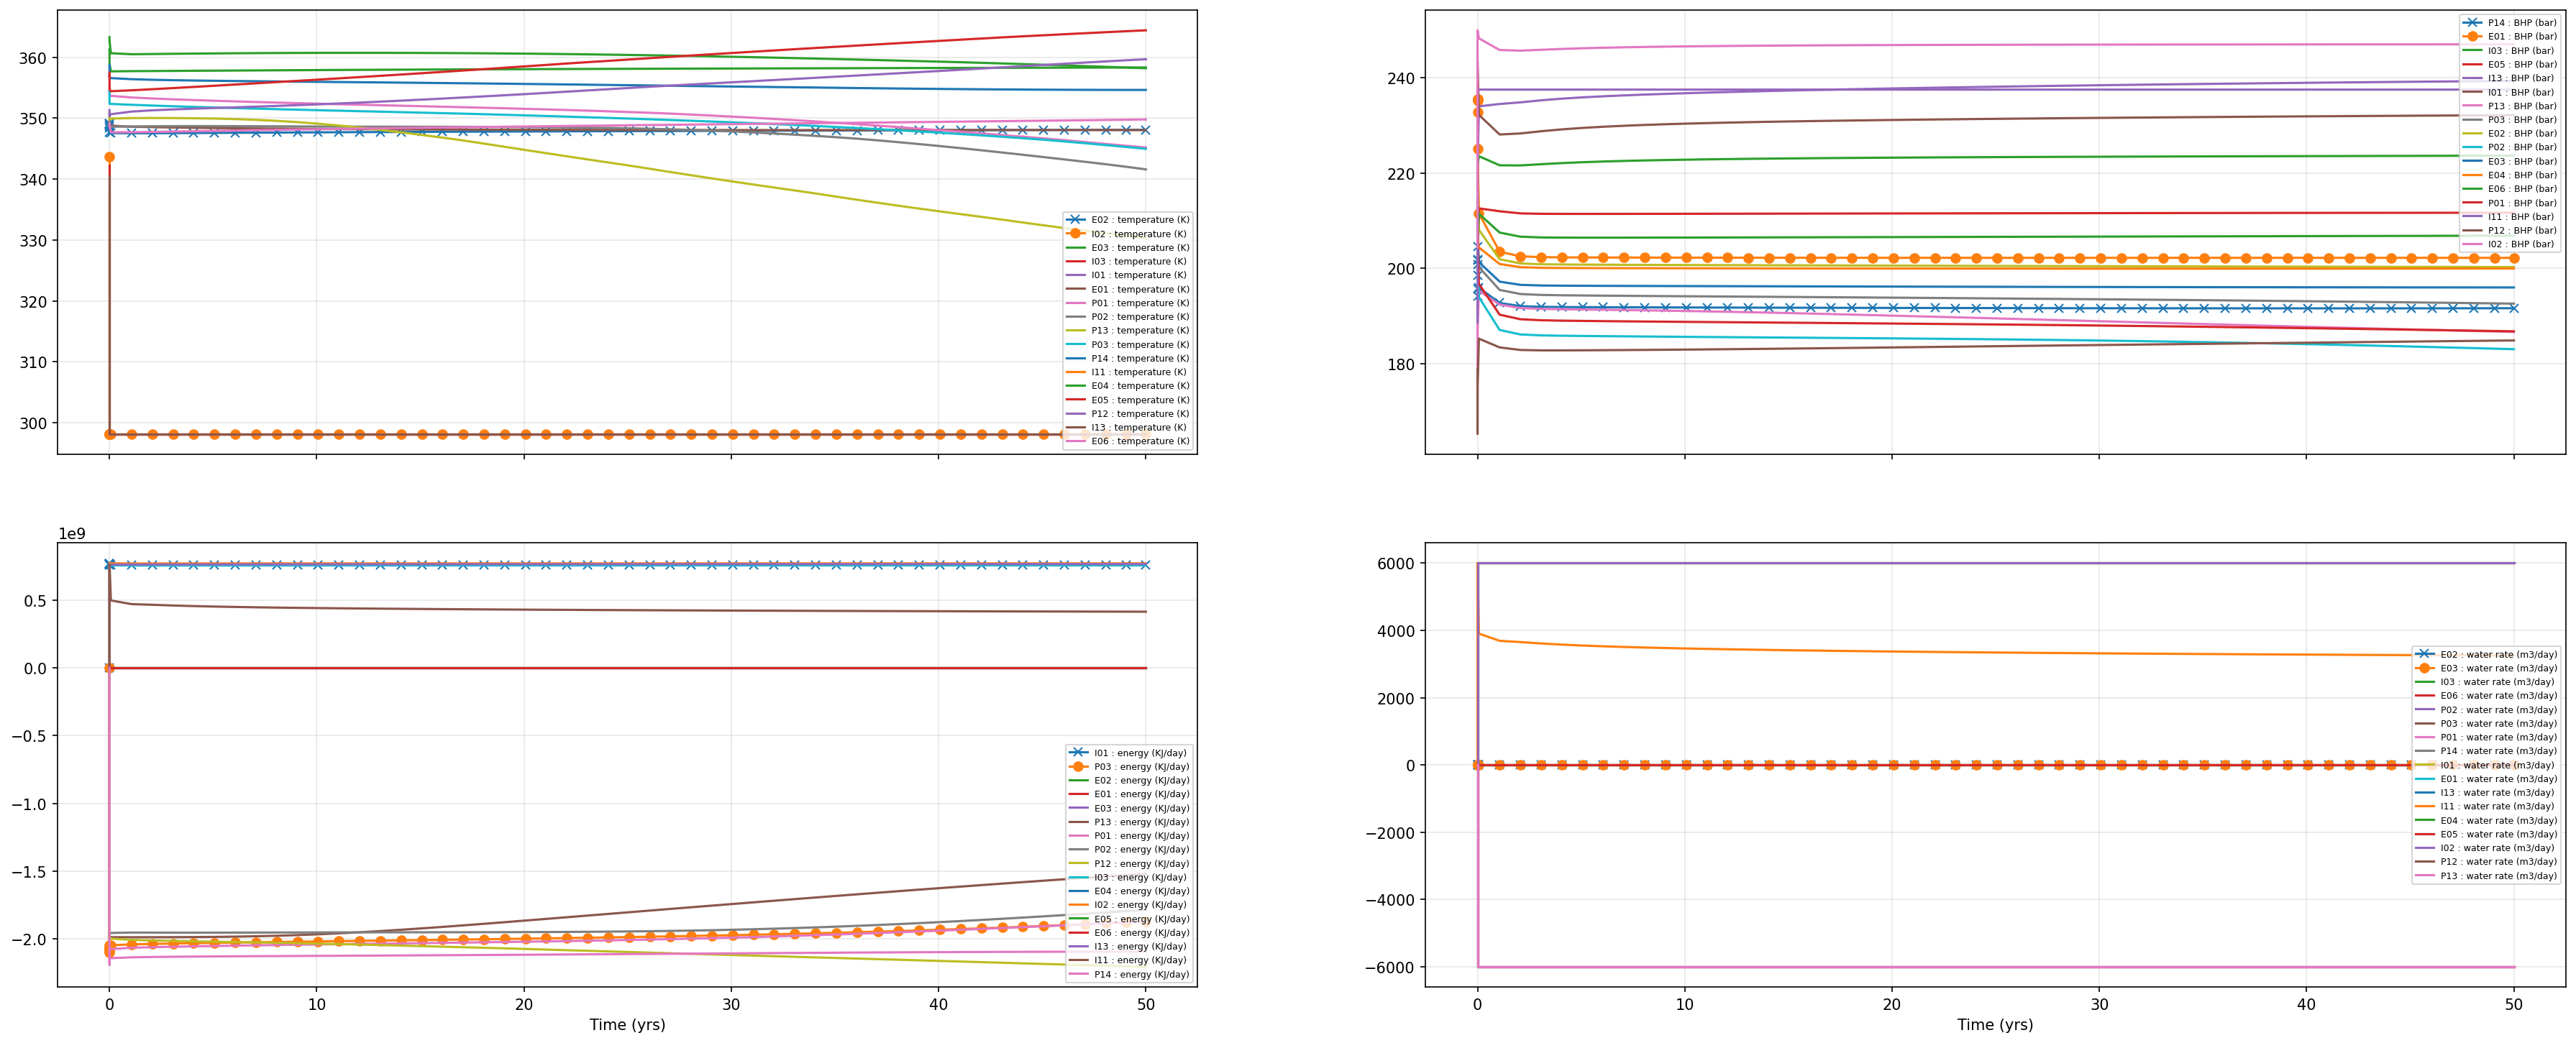

In [5]:
# do a first plot to get an overview of our data
# define a plot
fig, ax = plt.subplots(2,2, figsize=(30,12), dpi=150, sharex=True)
# get plot axes
ax_list = fig.axes

# plot a few keywords in pairs for both wells
for i, key in enumerate(['temperature (K)', 'BHP (bar)','energy (KJ/day)','water rate (m3/day)']):
    data.plot(x='Time (yrs)',
              y=data.filter(like=key).columns.tolist(),
              ax=ax_list[i],
              linestyle='-',
              style=['x', 'o'])
    ax_list[i].legend(fontsize=6)
    ax_list[i].grid(alpha=0.3)

plt.show()

In [6]:
data['Datetime'] = pd.to_datetime('1/1/2000') + pd.to_timedelta(
    data['Time (yrs)'] * pd.Timedelta(('365 days')), unit = 's')
data.set_index('Datetime', inplace=True)

set_interval = '365D'

resample_index = pd.date_range(data.index[0] - pd.Timedelta(set_interval),
                              data.index[-1] + pd.Timedelta(set_interval), freq=set_interval, normalize=True,
                               closed = 'right')


In [7]:
tdata = data.reindex(data.index.union(resample_index)).interpolate('index').reindex(resample_index)

tdata.iloc[0] = data.iloc[0]
tdata.iloc[-1]= data.iloc[-1]

tdata['econ_periods'] = np.arange(len(tdata))

In [8]:
tdata

,P14 : BHP (bar),P14 : p 19 c 1 rate (Kmol/day),P14 : p 19 c 0 rate (Kmol/day),P14 : p 18 c 1 rate (Kmol/day),P14 : p 18 c 0 rate (Kmol/day),P14 : p 17 c 1 rate (Kmol/day),P14 : p 17 c 0 rate (Kmol/day),P14 : p 15 c 1 rate (Kmol/day),P14 : p 14 c 1 rate (Kmol/day),P14 : p 14 c 0 rate (Kmol/day),...,P14 : p 6 c 0 rate (Kmol/day),E05 : p 15 c 0 rate (Kmol/day),P14 : p 7 c 0 rate (Kmol/day),I13 : c 0 rate (Kmol/day),P14 : p 7 c 1 rate (Kmol/day),P14 : p 8 c 1 rate (Kmol/day),P14 : p 9 c 0 rate (Kmol/day),P14 : p 9 c 1 rate (Kmol/day),Time (yrs),econ_periods
2000-01-01,204.553512,-17402.236934,-6.954703e+07,-16448.578303,-6.624391e+07,-6327.062585,-2.528490e+07,-3703.248658,-59.236536,-238549.603250,...,3.609455e+01,-2.819717e+07,2.453403e+02,0.000000e+00,83886.413669,62000.838329,6.074717e+01,20770.589777,2.739726e-09,0
2000-12-31,192.994173,-9595.147249,-3.842333e+07,-10309.105866,-4.138833e+07,-4356.911060,-1.744801e+07,-3796.825127,-66.425811,-266701.962437,...,-1.086832e+07,1.011591e+00,-1.167276e+08,1.501968e+09,-29137.151508,-29664.531880,-1.468891e+08,-36668.524958,1.000000e+00,1
2001-12-31,192.148110,-9614.472009,-3.849386e+07,-10313.103349,-4.139264e+07,-4365.776344,-1.748025e+07,-3803.782724,-66.462030,-266770.120515,...,-1.088862e+07,9.949034e-01,-1.171016e+08,1.500743e+09,-29236.234594,-29730.693047,-1.474313e+08,-36810.969154,2.000000e+00,2
2002-12-31,191.967838,-9637.868362,-3.858400e+07,-10321.228996,-4.142312e+07,-4376.684208,-1.752225e+07,-3813.411413,-66.526172,-267012.325490,...,-1.090600e+07,9.942744e-01,-1.174434e+08,1.499377e+09,-29324.769428,-29777.705096,-1.478623e+08,-36922.448244,3.000000e+00,3
2003-12-31,191.915380,-9659.934375,-3.866968e+07,-10328.327930,-4.145086e+07,-4386.892493,-1.756187e+07,-3822.423119,-66.585544,-267244.238636,...,-1.092083e+07,9.946407e-01,-1.177624e+08,1.497857e+09,-29406.951897,-29817.272513,-1.482584e+08,-37024.396852,4.000000e+00,4
2004-12-30,191.889489,-9680.670255,-3.875029e+07,-10334.563423,-4.147540e+07,-4396.447570,-1.759900e+07,-3830.850981,-66.639229,-267455.088098,...,-1.093375e+07,9.954956e-01,-1.180631e+08,1.496216e+09,-29484.344706,-29851.907922,-1.486311e+08,-37120.272159,5.000000e+00,5
2005-12-30,191.871234,-9700.291964,-3.882658e+07,-10340.217191,-4.149767e+07,-4405.479386,-1.763410e+07,-3838.818540,-66.688186,-267647.533690,...,-1.094521e+07,9.967538e-01,-1.183483e+08,1.494506e+09,-29557.771597,-29882.878414,-1.489852e+08,-37211.358815,6.000000e+00,6
2006-12-30,191.856261,-9718.982241,-3.889925e+07,-10345.498613,-4.151847e+07,-4414.085830,-1.766755e+07,-3846.416489,-66.733470,-267825.553046,...,-1.095556e+07,9.983273e-01,-1.186204e+08,1.492757e+09,-29627.819715,-29911.052660,-1.493236e+08,-37298.415720,7.000000e+00,7
2007-12-30,191.843122,-9736.889906,-3.896889e+07,-10350.564816,-4.153843e+07,-4422.340316,-1.769964e+07,-3853.710758,-66.776068,-267992.947950,...,-1.096508e+07,1.000131e+00,-1.188812e+08,1.490984e+09,-29694.973277,-29937.082614,-1.496484e+08,-37381.965122,8.000000e+00,8
2008-12-29,191.831193,-9754.140251,-3.903599e+07,-10355.524916,-4.155796e+07,-4430.300747,-1.773059e+07,-3860.750483,-66.816718,-268152.573138,...,-1.097397e+07,1.002095e+00,-1.191324e+08,1.489204e+09,-29759.619867,-29961.465498,-1.499612e+08,-37462.423015,9.000000e+00,9


In [9]:
#calculate the difference in hours between timesteps
tdata['Deltahours'] = tdata.index.to_series().diff(1) / pd.Timedelta('1 hour')

tdata['Deltahours'].unique()
# tdata['P12: energy (KJ/day)']

array([  nan, 8760.])

In [10]:
#recompute time columns based on index
tdata['Time (yrs)'] = pd.to_timedelta(tdata.index - tdata.index[0]).total_seconds() / (365*24*60*60)
                                      
#reset index to time delta
tdata.set_index(pd.to_timedelta(tdata['Time (yrs)'] * pd.Timedelta(('365 days')), unit='s'), inplace=True)
tdata.drop(columns='time', inplace = True)

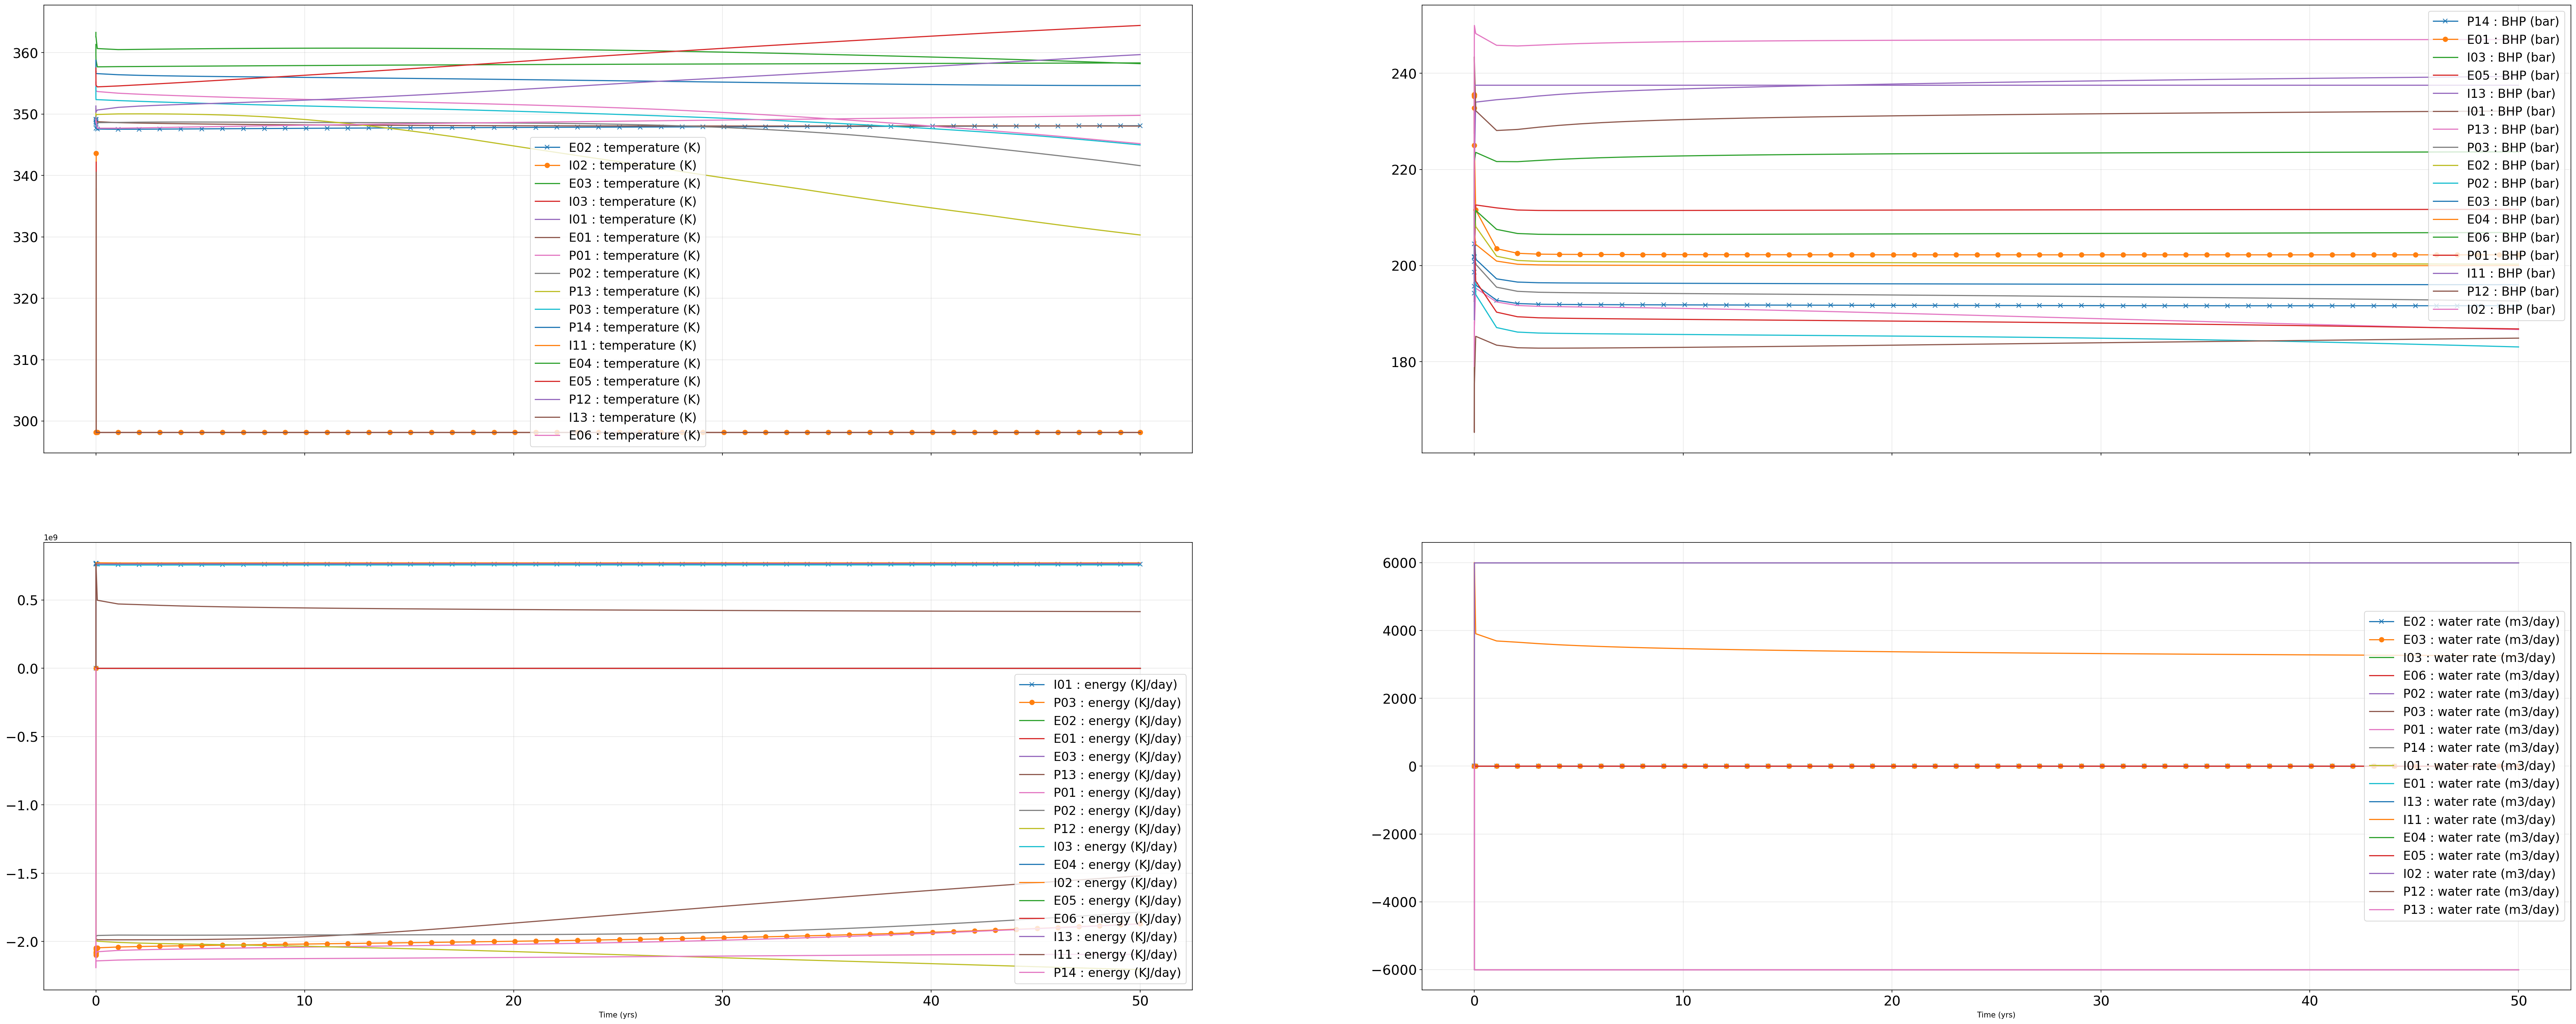

In [11]:
# define a plot
fig, ax = plt.subplots(2,2, figsize=(60,24), dpi=150, sharex=True)
# get plot axes
ax_list = fig.axes

# plot a few keywords in pairs for both wells
for i, key in enumerate(['temperature (K)', 'BHP (bar)','energy (KJ/day)','water rate (m3/day)']):
    data.plot(x='Time (yrs)',
              y=data.filter(like=key).columns.tolist(),
              ax=ax_list[i],
              linestyle='-',
              style=['x', 'o'],
              fontsize=18
             )
    ax_list[i].legend(fontsize=16)
    ax_list[i].grid(alpha=0.3)

plt.show()

<AxesSubplot:xlabel='Time (yrs)'>

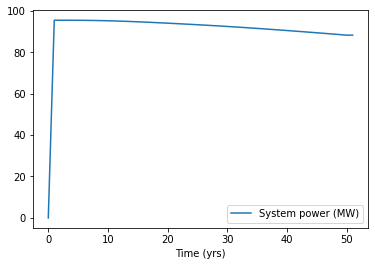

In [12]:
kJ_day_MW = 1/3.6e6/24
#these were the wells we actually want to use:
# 'I11', 'P12', 'I12', 'P13', 'I13', 'P14', 'E05', 'P03', 'P01', 'I03'
#compute system power
tdata['System power (MW)'] = (abs(tdata["P12 : energy (KJ/day)"]+tdata['P13 : energy (KJ/day)']+tdata['P14 : energy (KJ/day)']+tdata['P03 : energy (KJ/day)']+tdata['P01 : energy (KJ/day)'])
                             - abs(tdata['I11 : energy (KJ/day)']+tdata['I13 : energy (KJ/day)']+tdata['I03 : energy (KJ/day)'])) * kJ_day_MW
#note 4186.8 KJ/Kmol
#compute produced power
tdata['Produced Energy (MWh)'] = tdata['System power (MW)'] * tdata['Deltahours']

tdata.plot('Time (yrs)', 'System power (MW)')


In [13]:
#compute pressured drop
tdata['Pump dp (MPa)'] = abs(tdata["P12 : BHP (bar)"]+tdata['P13 : BHP (bar)']+tdata['P14 : BHP (bar)']+tdata['P03 : BHP (bar)']+tdata['P01 : BHP (bar)'] *0.1) - abs(tdata['I11 : BHP (bar)']+tdata['I13 : BHP (bar)']+tdata['I03 : BHP (bar)'] *0.1)

In [14]:
m3_day_m3_sec = 1 / (24*60*60)
pump_efficiency = 0.5

tdata['Pump power (MW)'] = abs(tdata['Pump dp (MPa)']) * abs(tdata['I11 : water rate (m3/day)']+tdata['I13 : water rate (m3/day)']+tdata['I03 : water rate (m3/day)'])* m3_day_m3_sec * pump_efficiency

#compute pumping costs
electricity_price = 100 #euro/MWh
tdata['OpEx_pump (\u20ac)'] = tdata['Pump power (MW)'] * tdata['Deltahours'] * electricity_price

In [15]:
def drillingcostnl(depth):
    """
    Calculate the cost of drilling as a function of depth
    Reference source:
        http://www.thermogis.nl/en/economic-model
        
    :param depth: float
        measured depth along hole in meters
    
    :return: float
        costs in euros
    """
    drilling_cost_nl = 375000 + 1150 * depth + 0.3 * depth ** 2
    return(drilling_cost_nl)
#how do we determine how deep the wells have been drilled? BHP is a guess
depth = 2355 #assuming 212 bar average at hydrostatic
drill_well = drillingcostnl(depth)
#costs of stuff
surf_piping_capex= 600000 #per km
surf_piping_opex = 50000 #per km (this is about 2.7% in real life.)
hex_capex = 2000000
hex_opex = 10000
filter_bag_capex = 4500
filter_bag_opex = 70000
inj_pump_capex = 300000 #replaced every 5 years
inj_pump_opex = 15000
esp_capex= 400000 
christ_tree_capex=250000 #wellhead
christ_opex=10000
degasser_capex= 1000000
degasser_opex=15000
esp_replace = 300000 #replaced every 3 years

#assign capex for drilling the wells
tdata['CapEx (\u20ac)'] = 0
tdata.loc[tdata.index == tdata.index[0], 'CapEx (\u20ac)'] = 2* 4113000

# tdata['Pump power(MW)'] * tdata['Deltahours'] * electricity_price
periodic_OpEx_rate = 0.07

#calc var OpEx costs
tdata['OpEx (\u20ac)'] = tdata['CapEx (\u20ac)'].cumsum()* periodic_OpEx_rate


In [16]:
#calculate cost of distribution system and other stuff
dist_pipe1 = np.sqrt((125-72)^2 + (170-152)^2)*50
dist_pipe2 = np.sqrt((125-72)^2 + (170-132)^2)*50
dist_pipe3 = np.sqrt((125-72)^2 + (170-112)^2)*50
dist_pipe4 = np.sqrt((125-100)^2 + (170-132)^2)*50
dist_pipe5 = np.sqrt((134-125)^2 + (170-115)^2)*50 
dist_pipe6 = np.sqrt((164-125)^2 + (170-110)^2)*50 #[164, 125], [110, 170]

pipe_dist = (dist_pipe1+dist_pipe2+dist_pipe3+dist_pipe4+dist_pipe5+dist_pipe6)/1000
pipe_cost = pipe_dist*surf_piping_capex
hex_cost = hex_capex*6 #six doublets
inj_pump_cost = 3*inj_pump_capex #3 injection wells
christ_cost = christ_tree_capex*3 #3 existing production wells, 3 require christ tree
degasser_cost = 6*degasser_capex #6 doublets
filter_cost = filter_bag_capex*6
esp_cost = 3*esp_capex #3 new production wells
drill_cost = drill_well * 5 #five new wells
                                                                       
#calculate LCOH
periodic_discount_rate = 0.05

#costs
tdata['LCOH costs'] = tdata['CapEx (\u20ac)'].fillna(0) \
    + tdata['CapEx (\u20ac)'] \
    +(((50/3)*esp_replace))\
    +(50*(surf_piping_opex*pipe_dist)\
    +(50*hex_opex)+(50*filter_bag_opex)\
    +(50*inj_pump_opex)+(50*degasser_opex)\
    +((50/5)*inj_pump_capex)\
    +(50*christ_opex)\
    +(pipe_cost+hex_cost+inj_pump_cost+christ_cost+degasser_cost+filter_cost+esp_cost+drill_cost))\
    + tdata['OpEx_pump (\u20ac)'].fillna(0)\

#discount LCOH
tdata['discounted LCOH costs'] = (tdata['LCOH costs'])\
    / (1 + periodic_discount_rate) ** tdata['econ_periods'].cumsum()

tdata['discounted LCOH energy'] = (tdata['Produced Energy (MWh)'].cumsum() /
                                  (1 + periodic_discount_rate) ** tdata['econ_periods']).cumsum()

tdata[r'LCOH (€/MWh)'] = tdata['discounted LCOH costs'] / tdata['discounted LCOH energy']

print('The total capital costs of the system is ' + str(tdata['LCOH costs'][0]) + ' euros.')
# tdata['LCOH costs'][0]

The total capital costs of the system is 80366700.727907 euros.


The total capital costs of the system is 80366700.727907 euros.
The initial pumping costs of the system are 23082239.30648477 euros.
The levelized cost of heat for the system is 0.004001092790542967 euros after fifteen years.


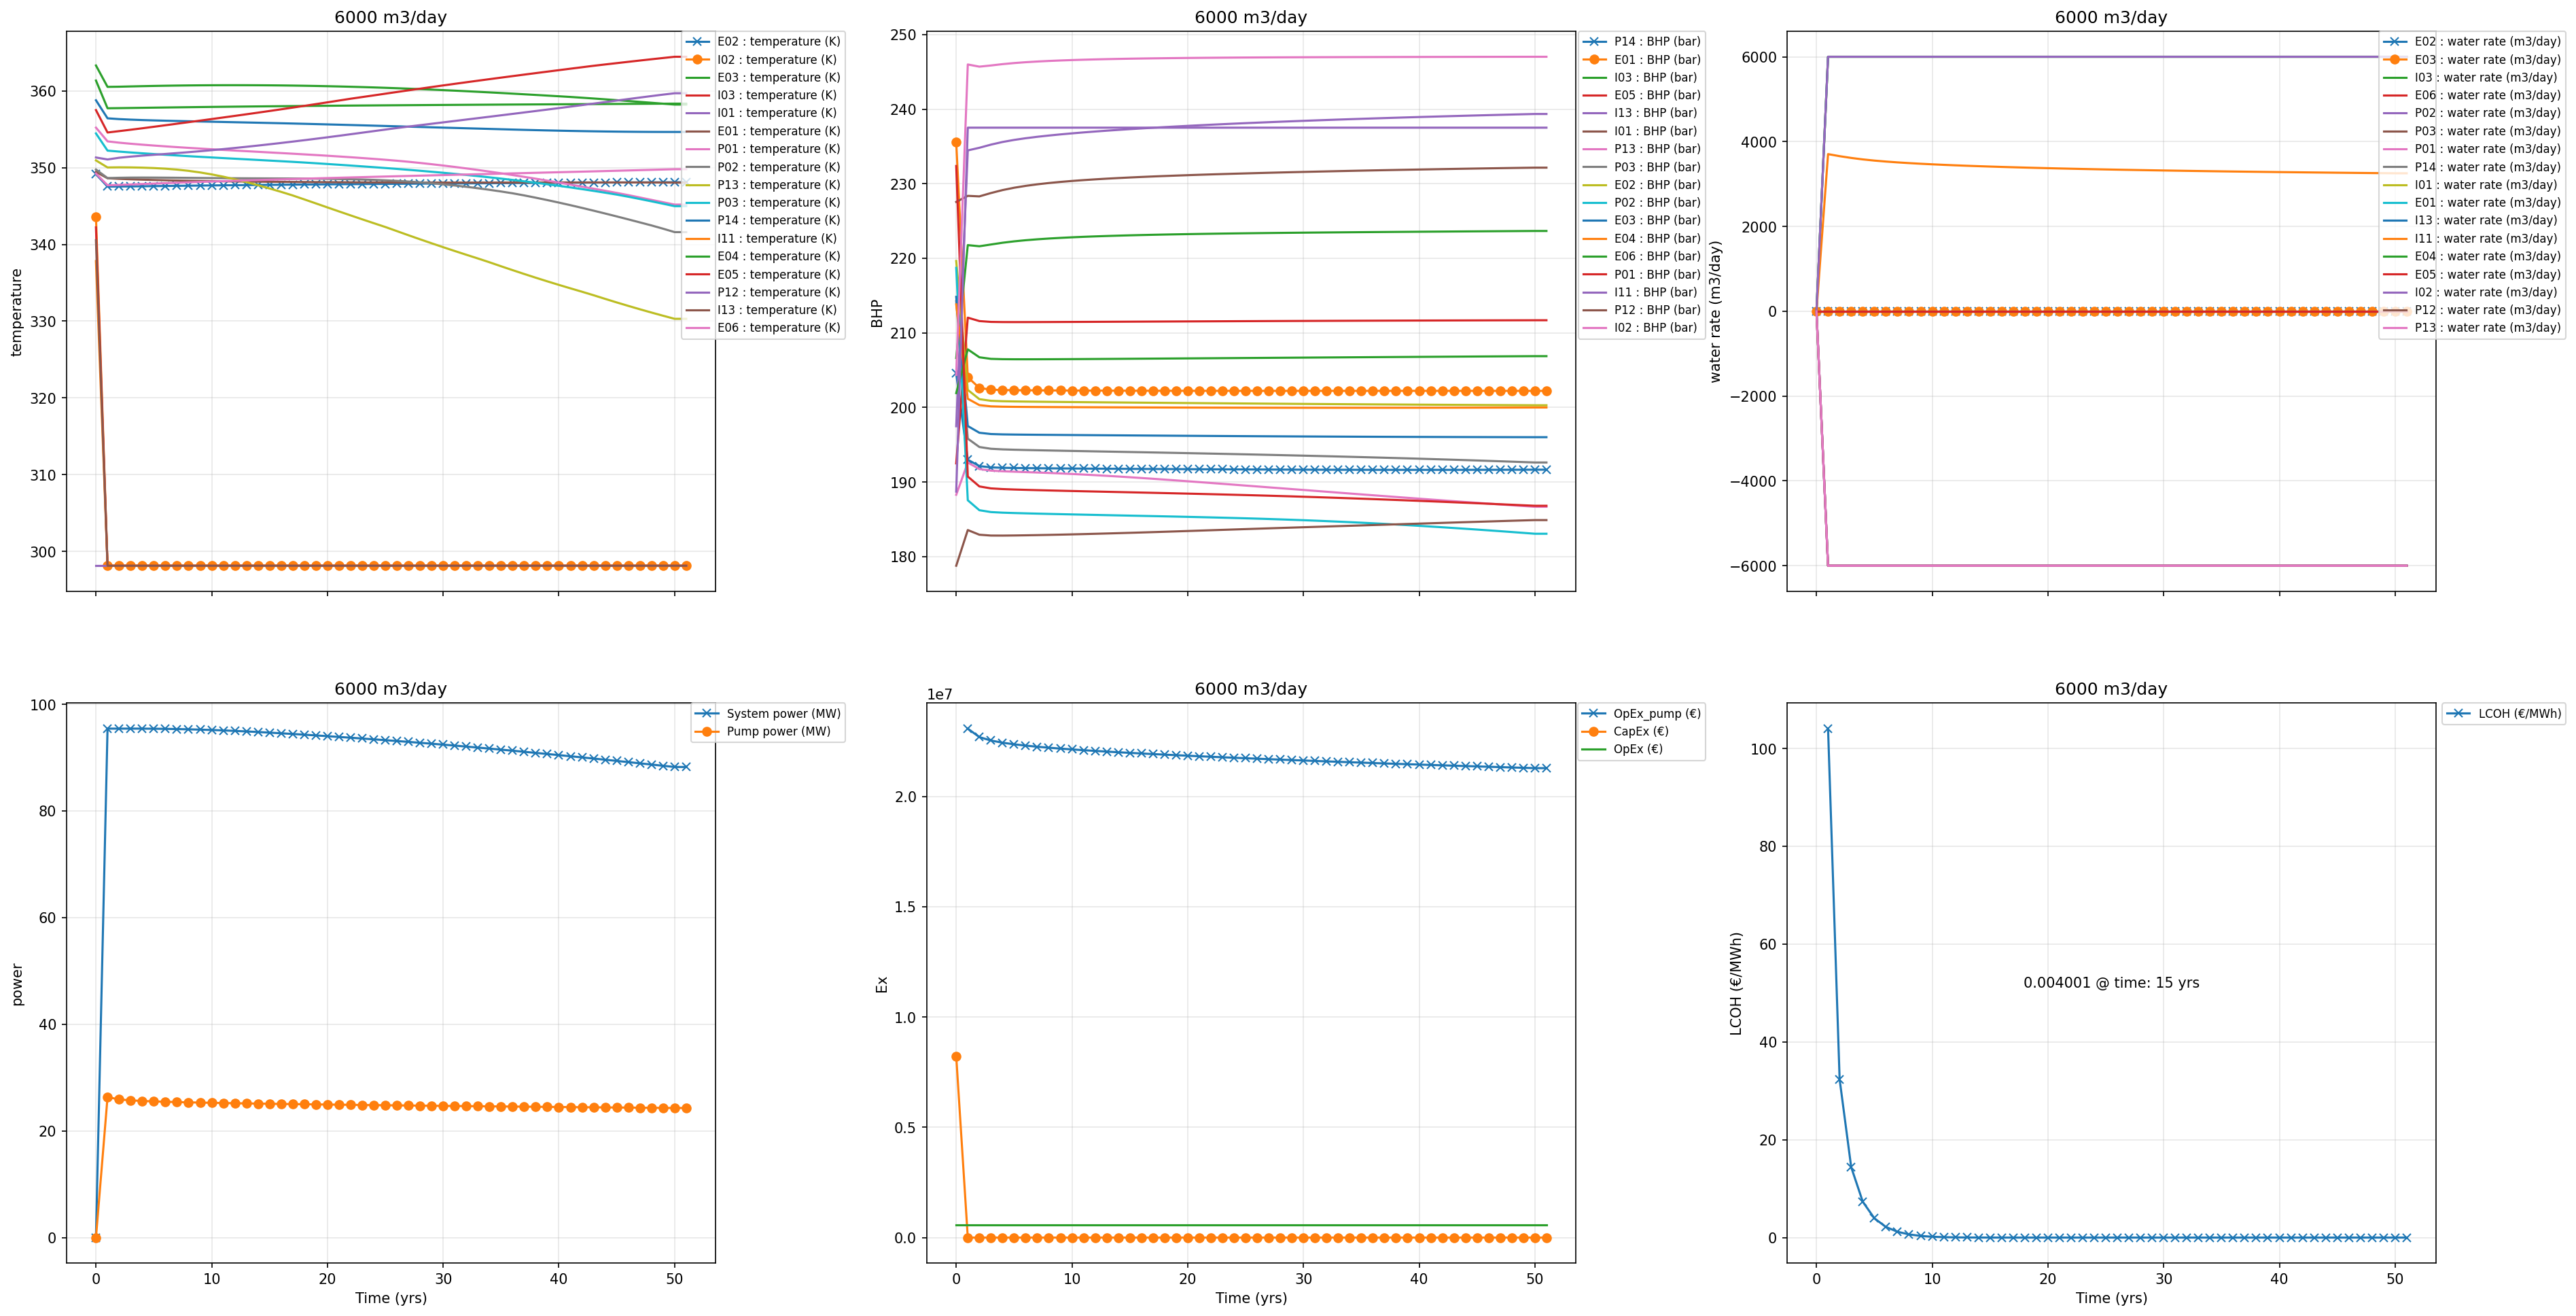

In [21]:
#final plot
# define a plot
fig, ax = plt.subplots(2,3, figsize=(30,16), dpi=150, sharex=True)
# get plot axes
ax_list = fig.axes

# plot a few keywords in pairs for both wells
for i, key in enumerate(['temperature', 'BHP','water rate (m3/day)',
                        'power', 'Ex', 'LCOH (€/MWh)']):
    tdata.plot(x='Time (yrs)',
              y=tdata.filter(like=key).columns.tolist(),
              ylabel=key,
              ax=ax_list[i],
              linestyle='-',
              style=['x', 'o'],
              fontsize=10,
              title="6000 m3/day"
             )
    plt.subplots_adjust(wspace=0.325)
    ax_list[i].legend(fontsize=8, bbox_to_anchor=(1.2, 1), loc='upper right', borderaxespad=0.)
    ax_list[i].grid(alpha=0.3)
    if key == 'LCOH (€/MWh)':
        ax_list[i].annotate('%0.6f @ time: %0.0f yrs' % (tdata[key].iloc[15], tdata['Time (yrs)'].iloc[15]),
                           xy=(0.5, 0.5), va='center', ha='center',
                           xycoords=('axes fraction'))
plt.savefig('operation6000.png', format='png', bbox_inches='tight')
# plt.show()
print('The total capital costs of the system is ' + str(tdata['LCOH costs'][0]) + ' euros.')
print('The initial pumping costs of the system are ' + str(tdata['OpEx_pump (\u20ac)'][1]) + ' euros.')
print('The levelized cost of heat for the system is ' + str(tdata[r'LCOH (€/MWh)'][15]) + ' euros after fifteen years.')